In [1]:
 #1. Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#  Load the Crime Dataset

df = pd.read_csv("crime.csv")   # <-- file you uploaded

# Display first rows
df.head()

year      state_name  district_name registration_circles  murder  homicide  \
0  2017  Andhra Pradesh  Ananthapuramu            Anantapur   113.0       4.0   
1  2017  Andhra Pradesh       Chittoor             Chittoor    70.0       5.0   
2  2017  Andhra Pradesh         Y.S.R.             Cuddapah    88.0      10.0   
3  2017  Andhra Pradesh  East Godavari        East Godavari    69.0      14.0   
4  2017  Andhra Pradesh  Ananthapuramu     Guntakal Railway    11.0       0.0   

   hit_and_run  acdnt_other_than_hit_and_run_  dowry_deaths  \
0         50.0                          503.0          14.0   
1         36.0                          461.0           8.0   
2         32.0                          437.0          15.0   
3        138.0                          503.0          10.0   
4          0.0                            0.0           3.0   

   abetment_of_suicide  ...  sale_food_drugs  rash_driving_pub_way  \
0                 63.0  ...              6.0                1041.0   
1                 24.0  ...              0.0                  52.0   
2                143.0  ...              0.0                6636.0   
3                 18.0  ...              0.0                1125.0   
4                  3.0  ...              0.0                   0.0   

   cheating_impersonation  ofnc_mischief  arson  criminal_trespass  \
0                     4.0            9.0   38.0              198.0   
1                     0.0            4.0    7.0              100.0   
2                     1.0           44.0   68.0              198.0   
3                     0.0           25.0   40.0              848.0   
4                     0.0            0.0    0.0                0.0   

   crlty_husbnd_relatives  criminal_intimidation  insult_modesty_women  \
0                   471.0                  139.0                   8.0   
1                   212.0                   26.0                  12.0   
2                   481.0                  332.0                  60.0   
3                   601.0                   50.0                 127.0   
4                     1.0                    2.0                   4.0   

   other_ipc_crimes  
0             159.0  
1             470.0  
2             447.0  
3              48.0  
4               6.0  

[5 rows x 56 columns]

In [2]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Fix missing hierarchical values
df['state_name'] = df['state_name'].ffill()
df['district_name'] = df['district_name'].ffill()
df['registration_circles'] = df['registration_circles'].ffill()

# Exclude non-numeric columns
exclude_cols = ['state_name', 'district_name', 'registration_circles', 'year']

crime_cols = [col for col in df.columns if col not in exclude_cols]

# Convert crime columns to numeric
df[crime_cols] = df[crime_cols].apply(pd.to_numeric, errors='coerce')

# Compute total crime
df["total_crime"] = df[crime_cols].sum(axis=1)

# Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["crime_index"] = scaler.fit_transform(df[["total_crime"]])

df.head()

year      state_name  district_name registration_circles  murder  homicide  \
0  2017  Andhra Pradesh  Ananthapuramu            Anantapur   113.0       4.0   
1  2017  Andhra Pradesh       Chittoor             Chittoor    70.0       5.0   
2  2017  Andhra Pradesh         Y.S.R.             Cuddapah    88.0      10.0   
3  2017  Andhra Pradesh  East Godavari        East Godavari    69.0      14.0   
4  2017  Andhra Pradesh  Ananthapuramu     Guntakal Railway    11.0       0.0   

   hit_and_run  acdnt_other_than_hit_and_run_  dowry_deaths  \
0         50.0                          503.0          14.0   
1         36.0                          461.0           8.0   
2         32.0                          437.0          15.0   
3        138.0                          503.0          10.0   
4          0.0                            0.0           3.0   

   abetment_of_suicide  ...  cheating_impersonation  ofnc_mischief  arson  \
0                 63.0  ...                     4.0            9.0   38.0   
1                 24.0  ...                     0.0            4.0    7.0   
2                143.0  ...                     1.0           44.0   68.0   
3                 18.0  ...                     0.0           25.0   40.0   
4                  3.0  ...                     0.0            0.0    0.0   

   criminal_trespass  crlty_husbnd_relatives  criminal_intimidation  \
0              198.0                   471.0                  139.0   
1              100.0                   212.0                   26.0   
2              198.0                   481.0                  332.0   
3              848.0                   601.0                   50.0   
4                0.0                     1.0                    2.0   

   insult_modesty_women  other_ipc_crimes  total_crime  crime_index  
0                   8.0             159.0       5594.0     0.069046  
1                  12.0             470.0       2893.0     0.035708  
2                  60.0             447.0      12585.0     0.155336  
3                 127.0              48.0       6012.0     0.074206  
4                   4.0               6.0         63.0     0.000778  

[5 rows x 58 columns]

In [3]:
# Select features & target
X = df[crime_cols]
y = df["total_crime"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model Training Complete")
print("Accuracy on test set:", model.score(X_test, y_test))

Model Training Complete
Accuracy on test set: 0.9135244456550535


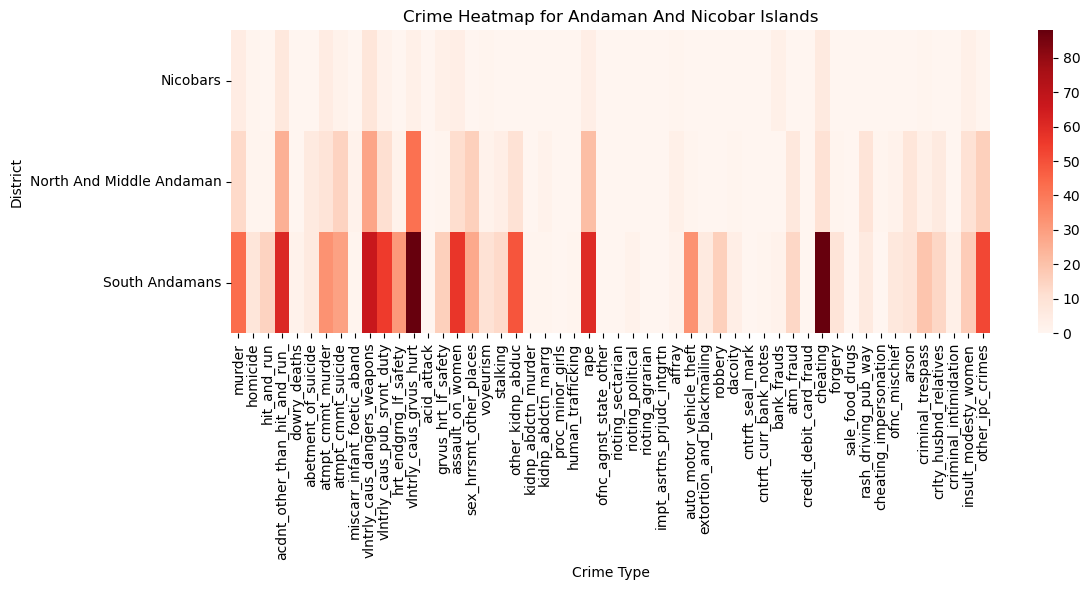

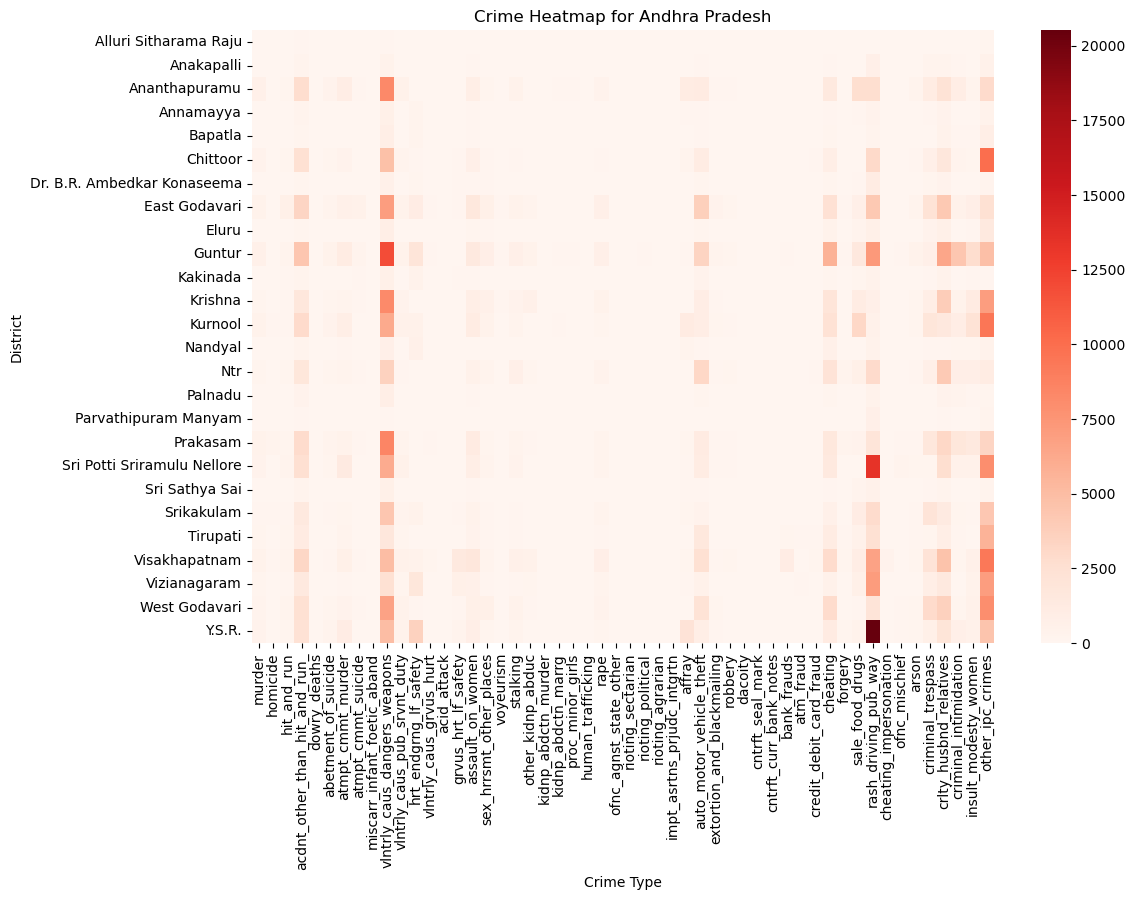

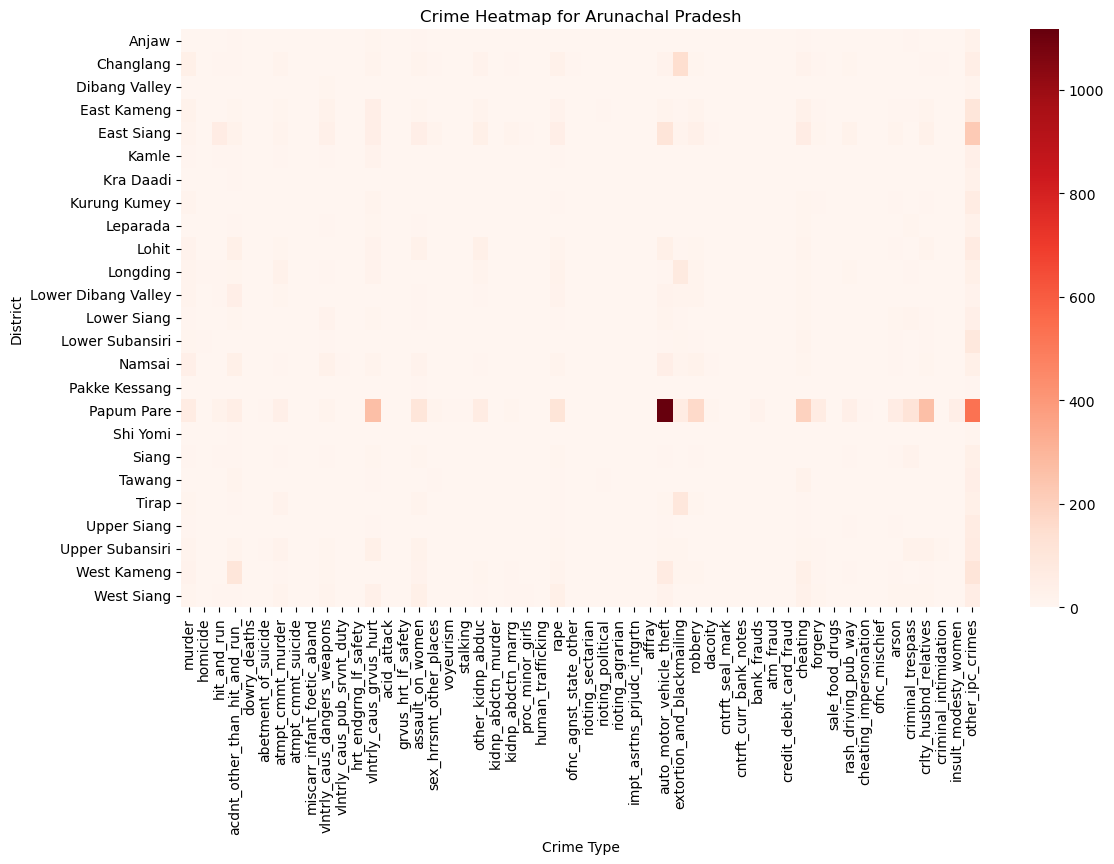

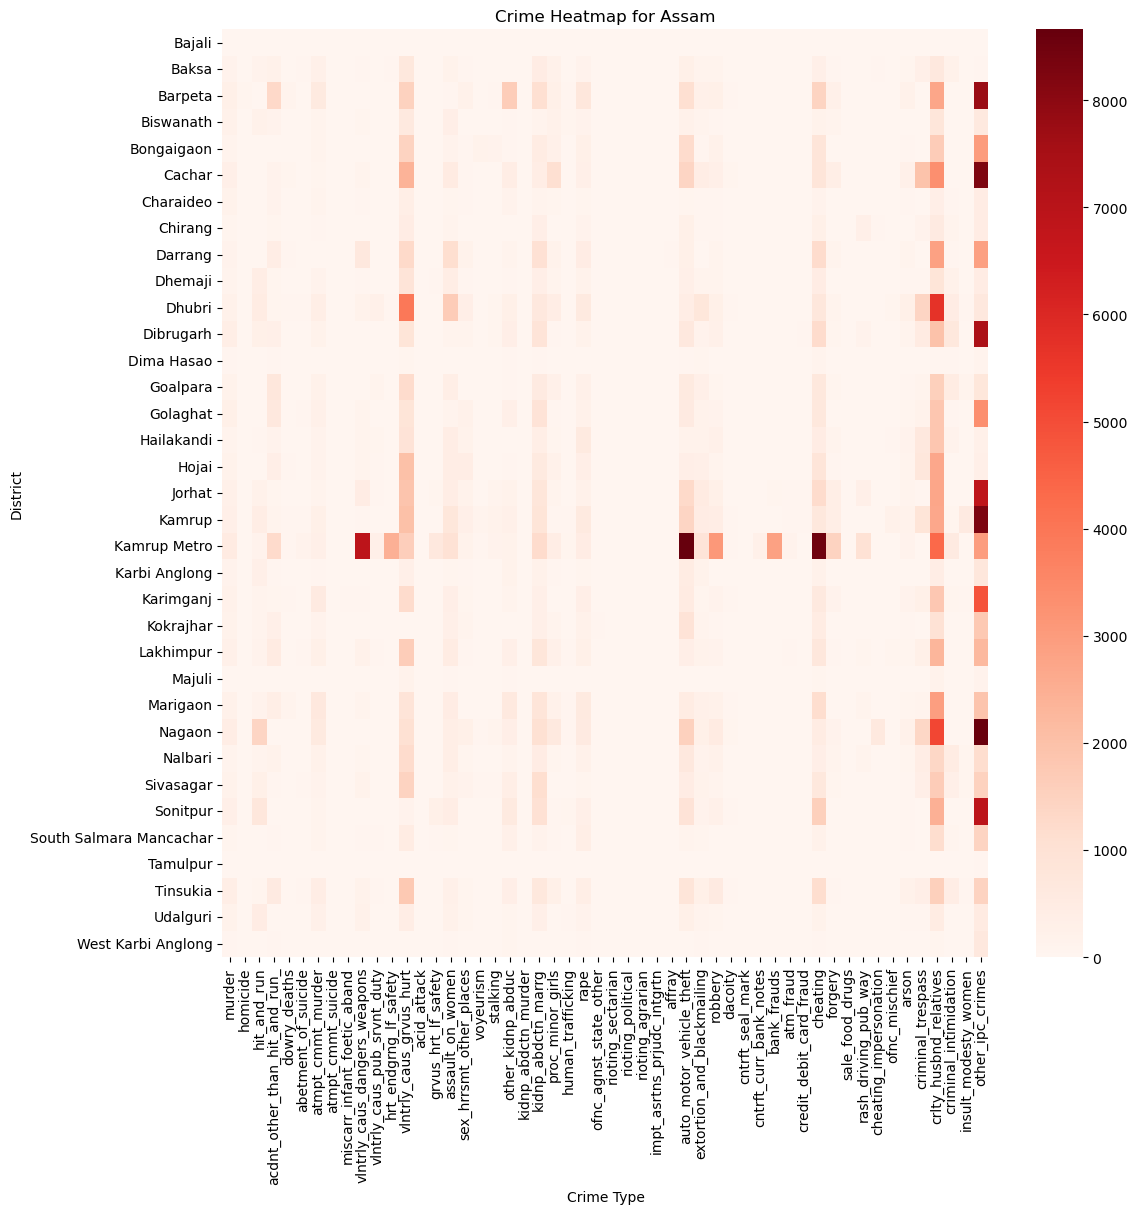

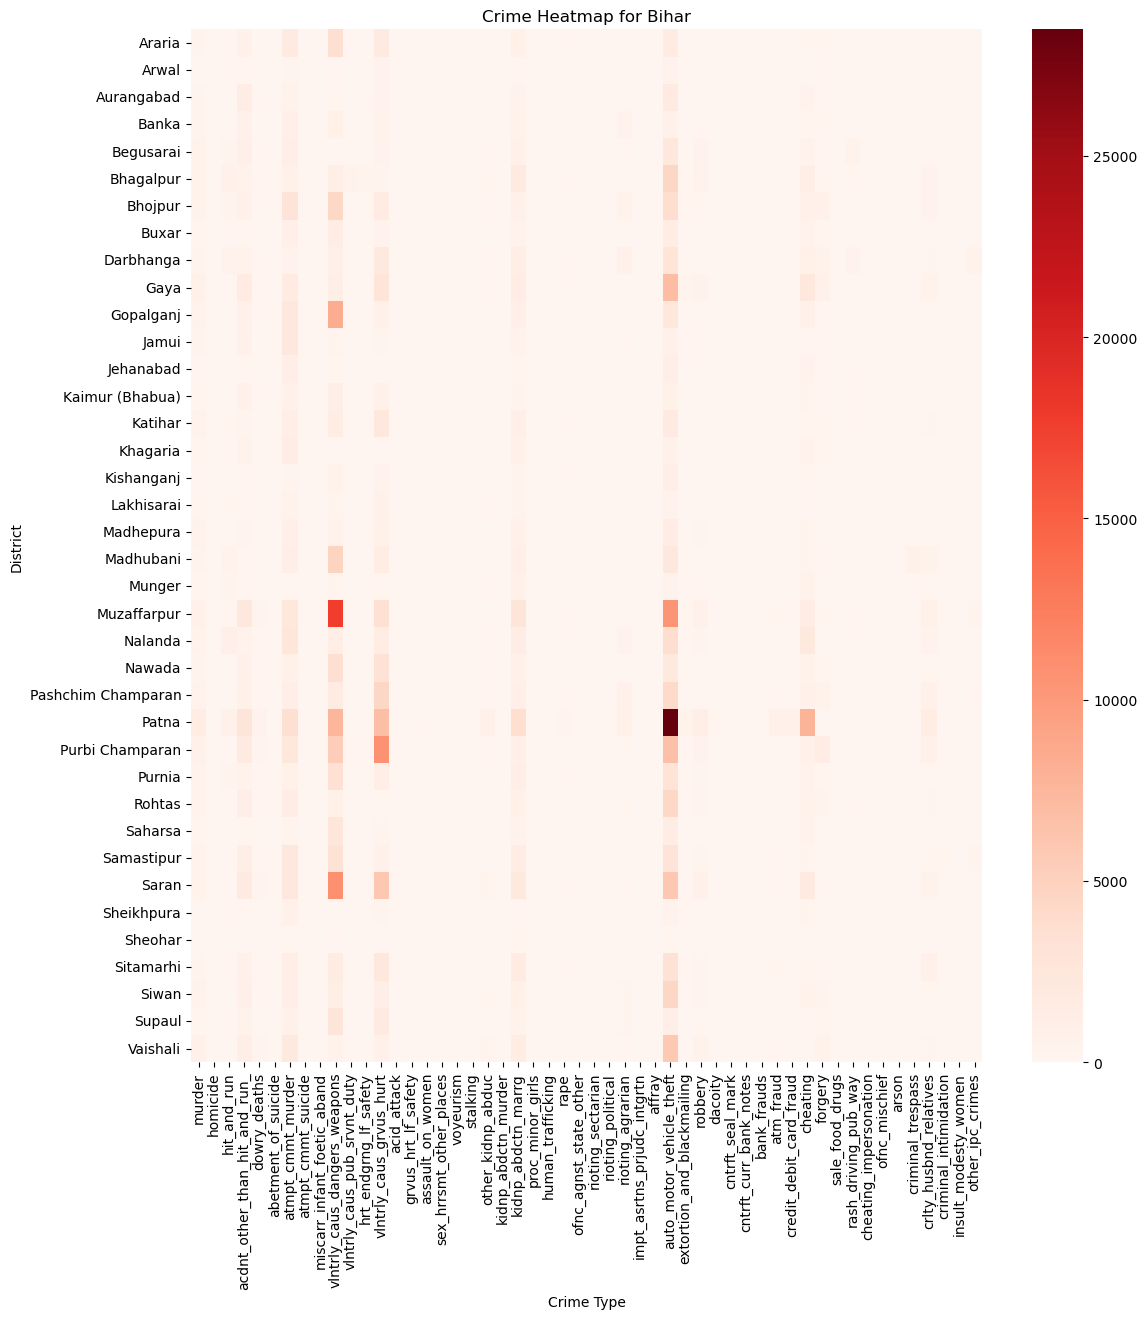

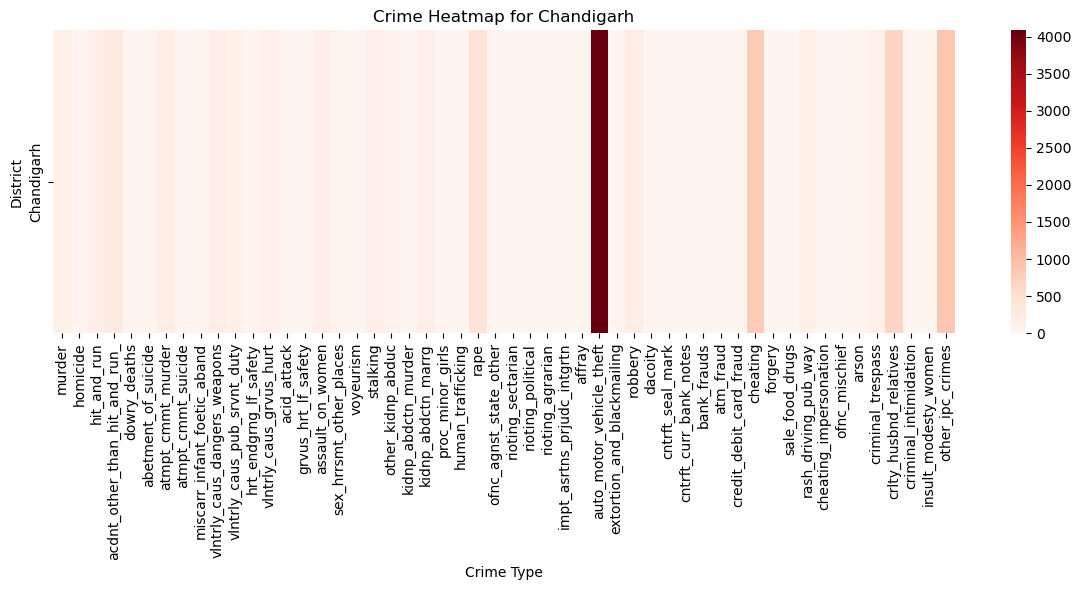

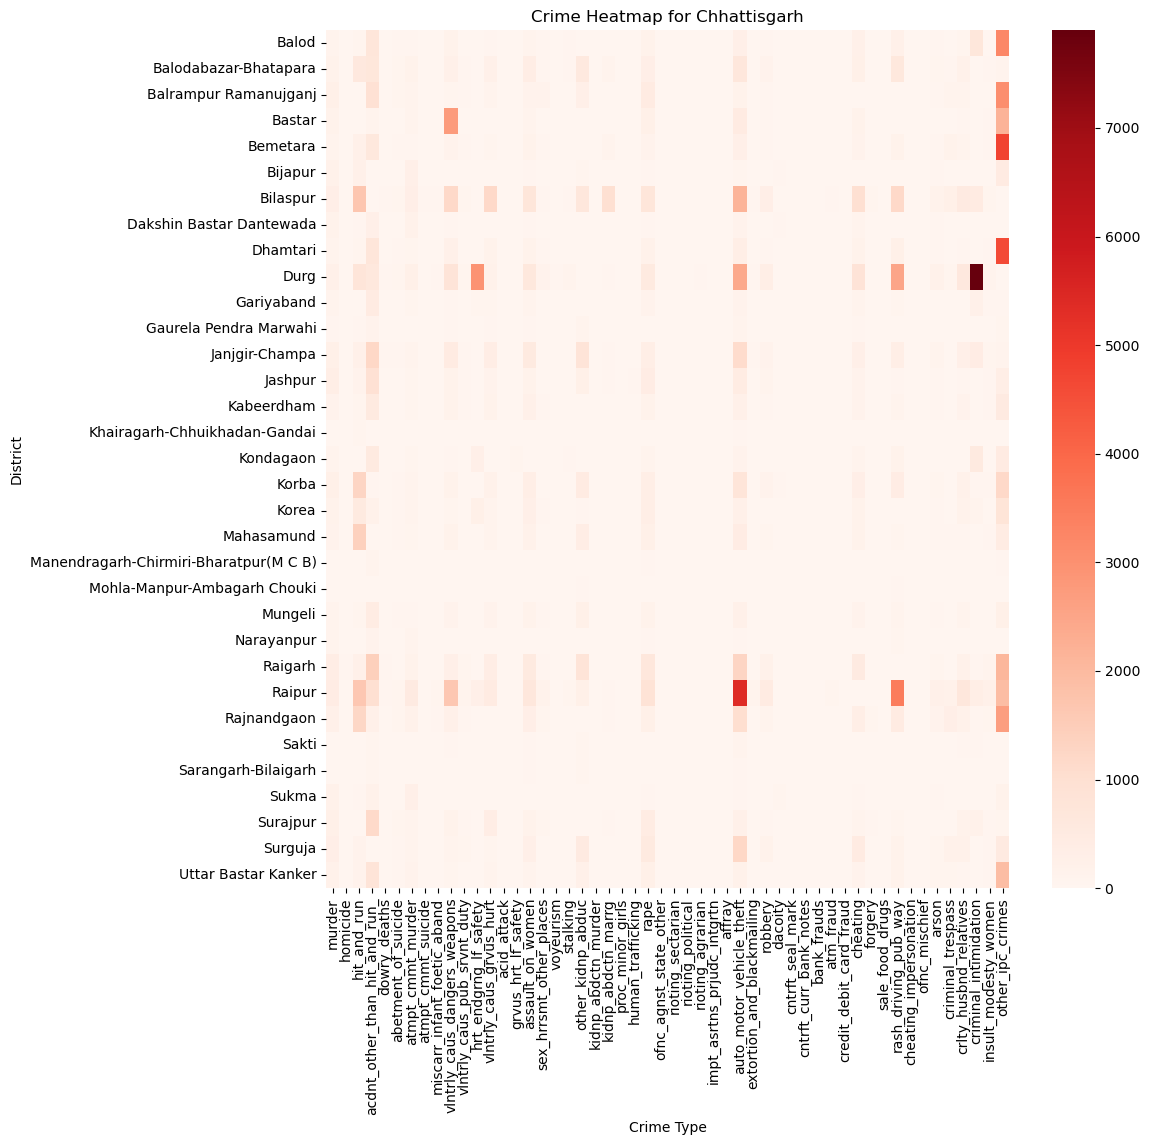

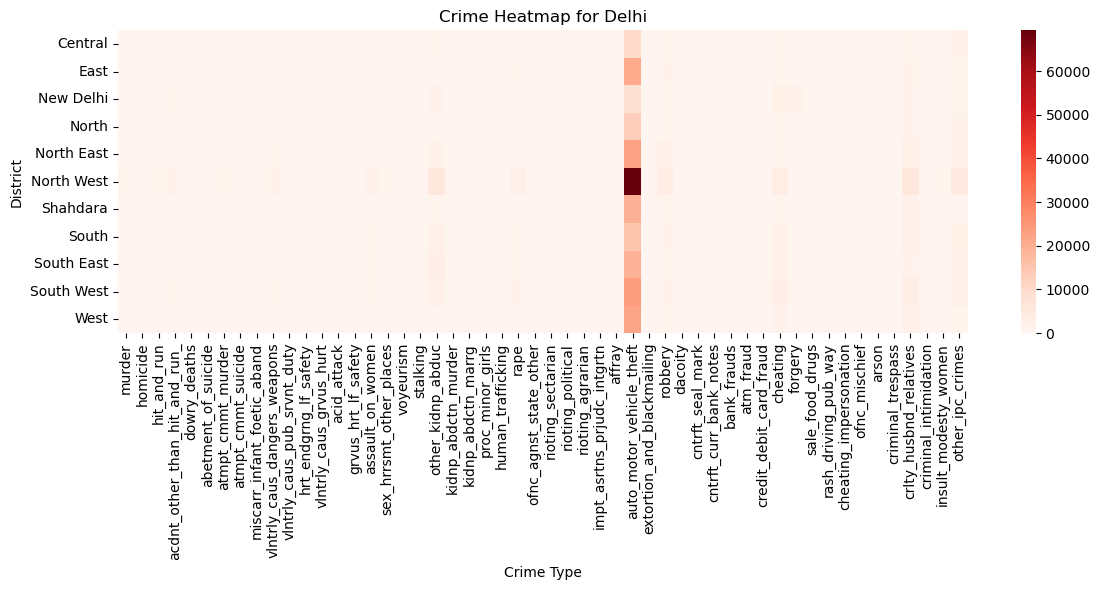

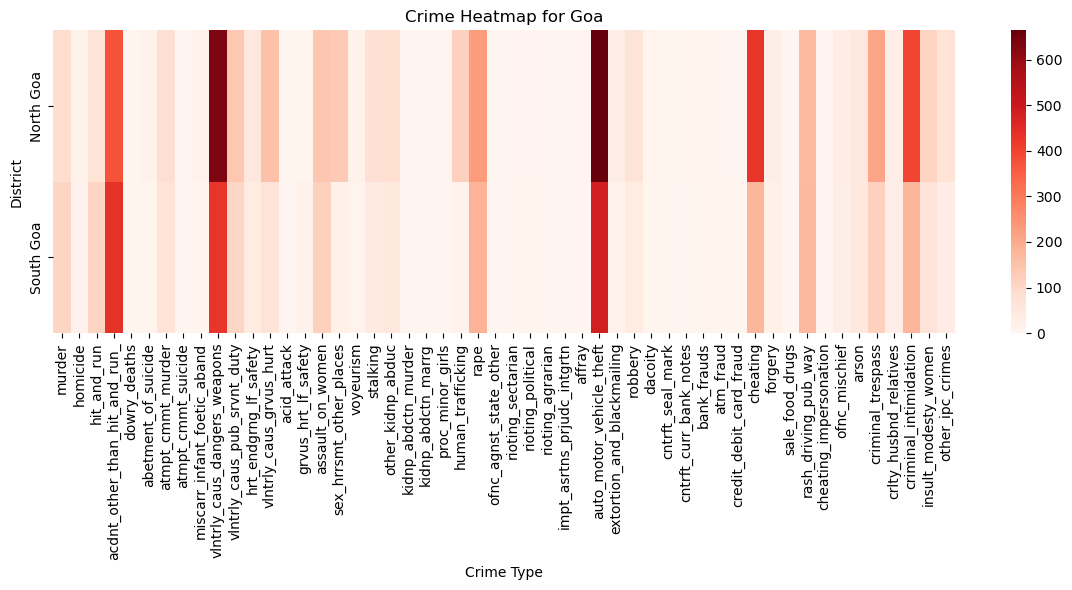

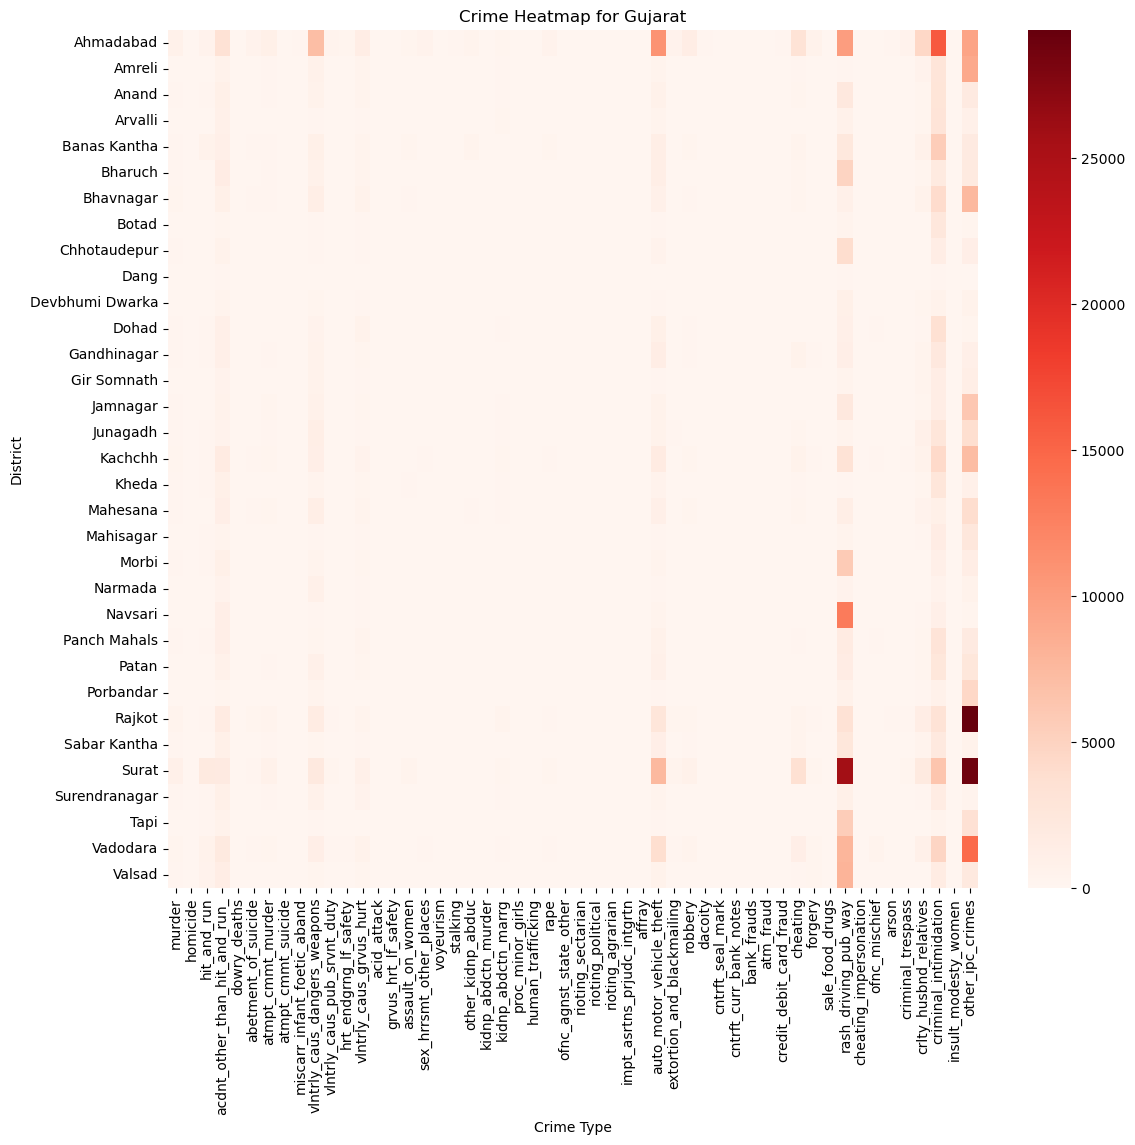

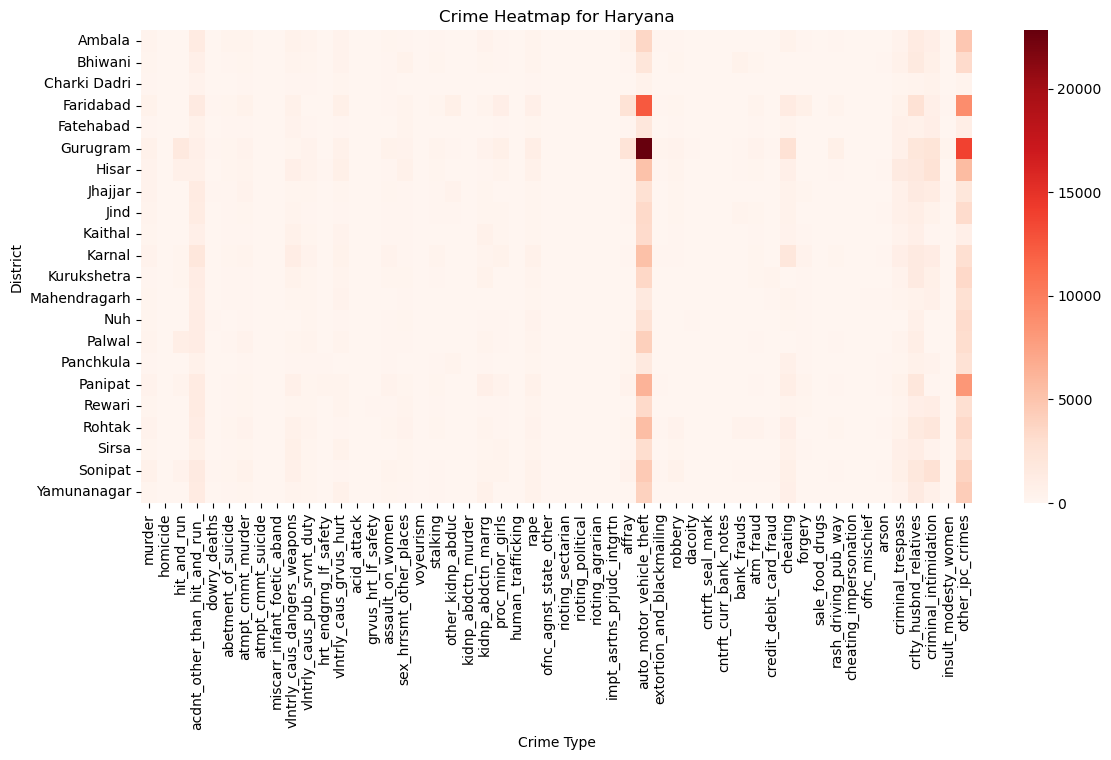

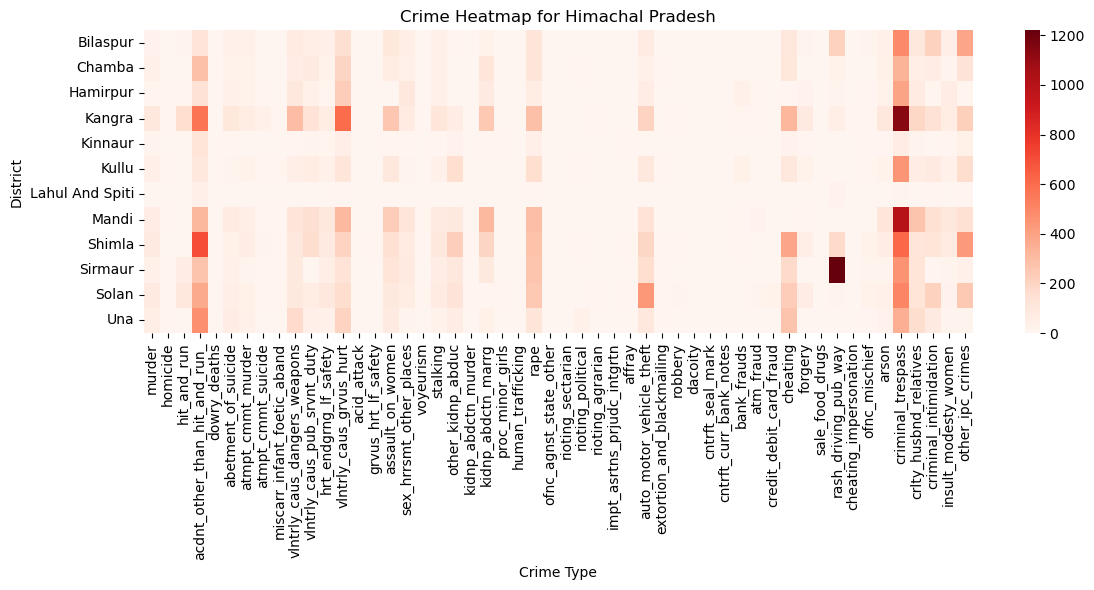

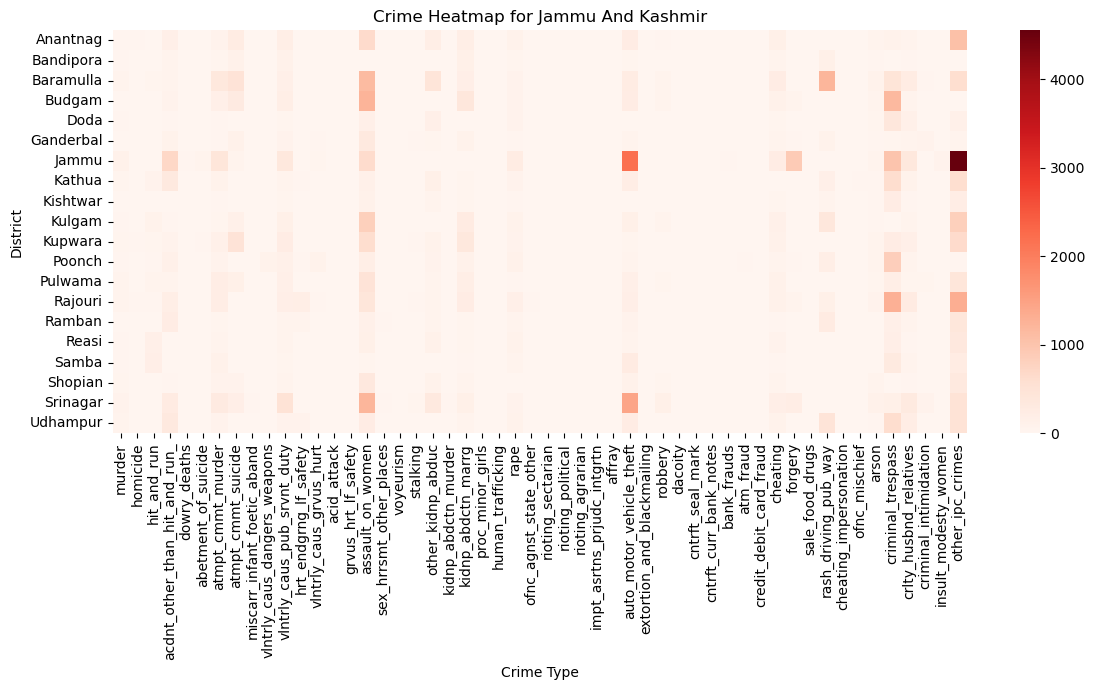

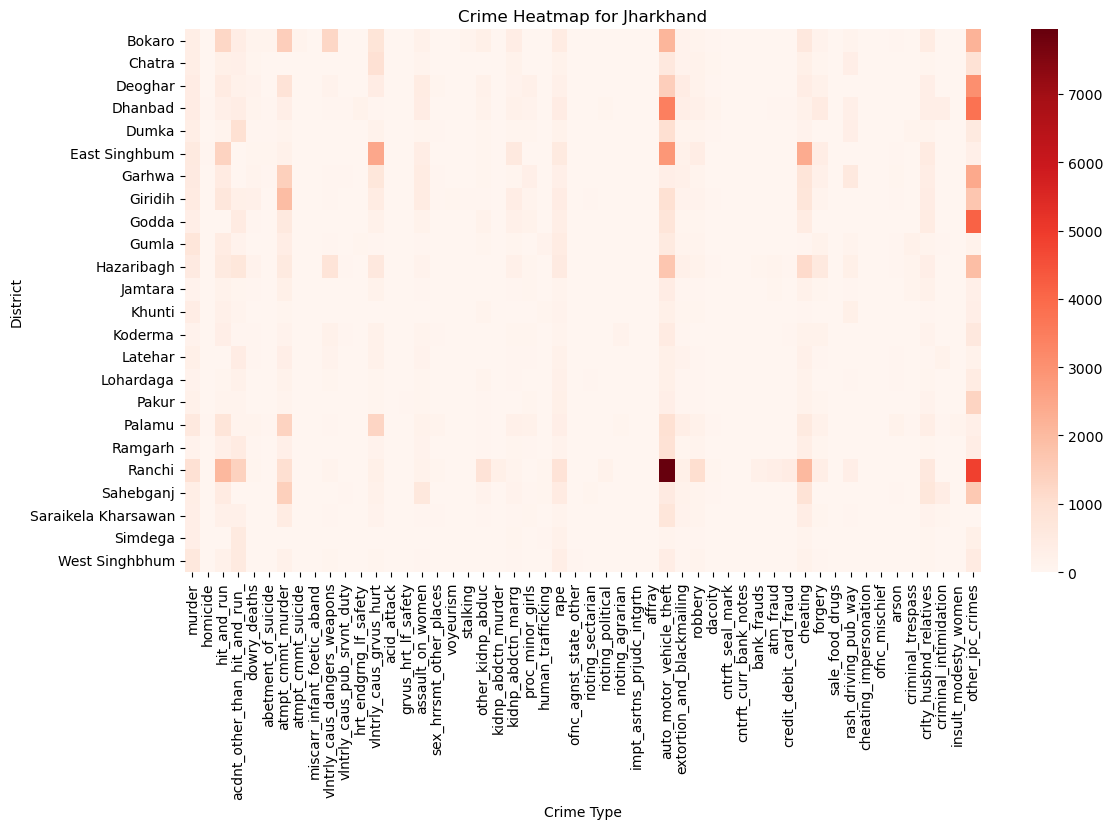

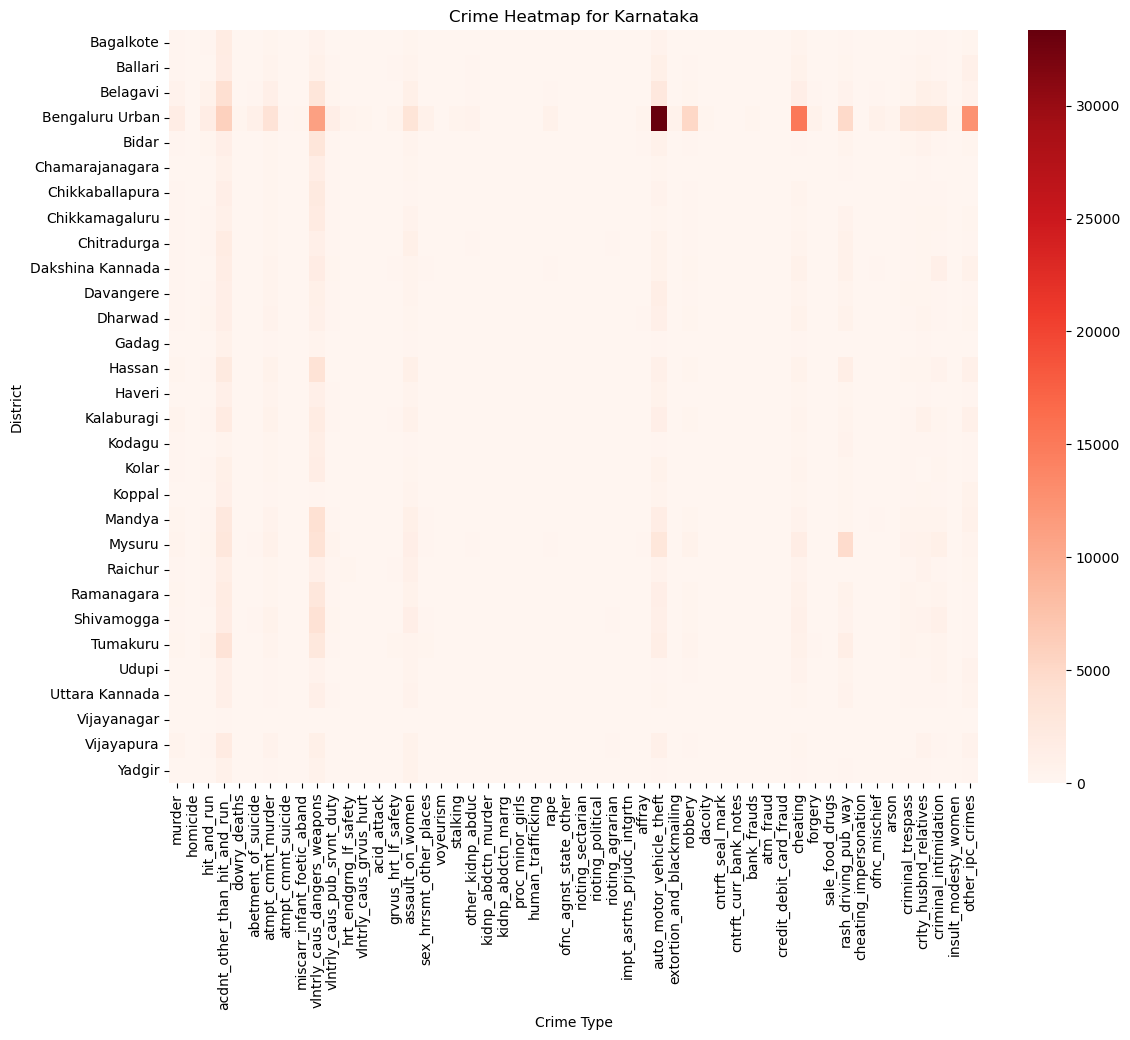

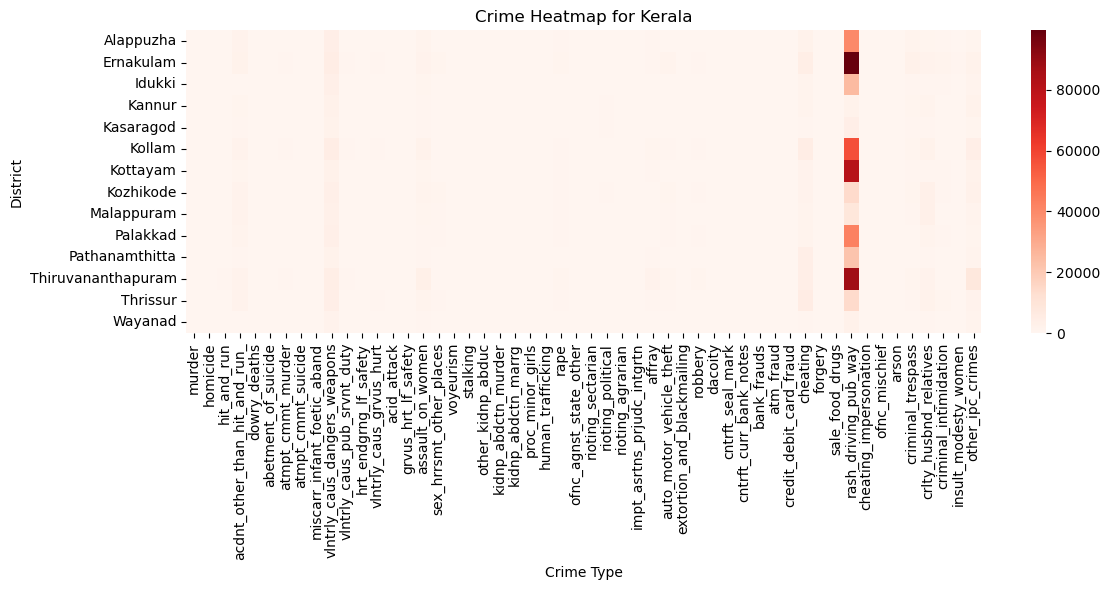

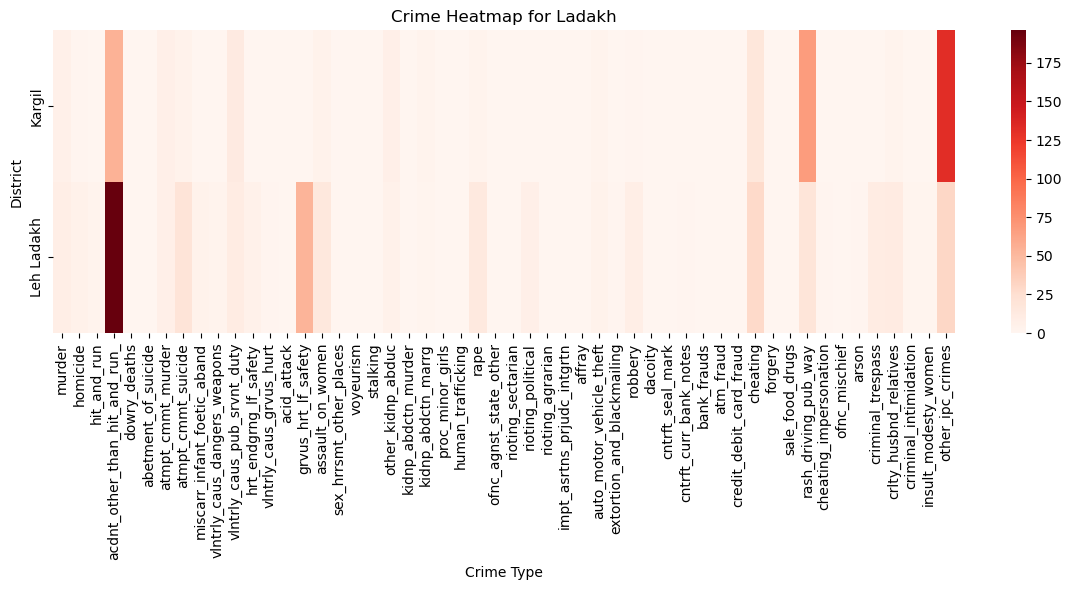

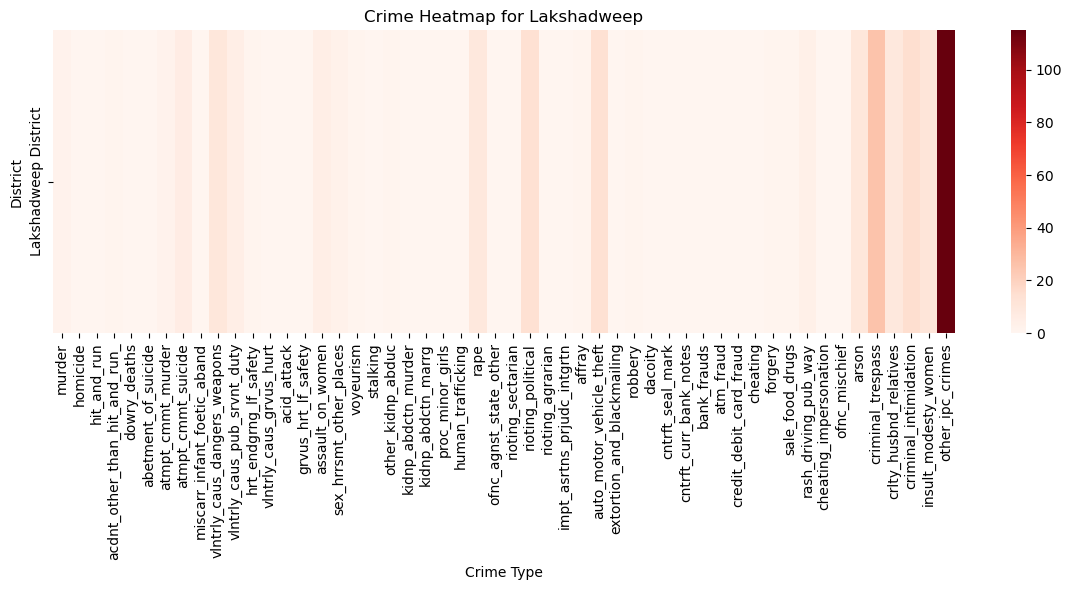

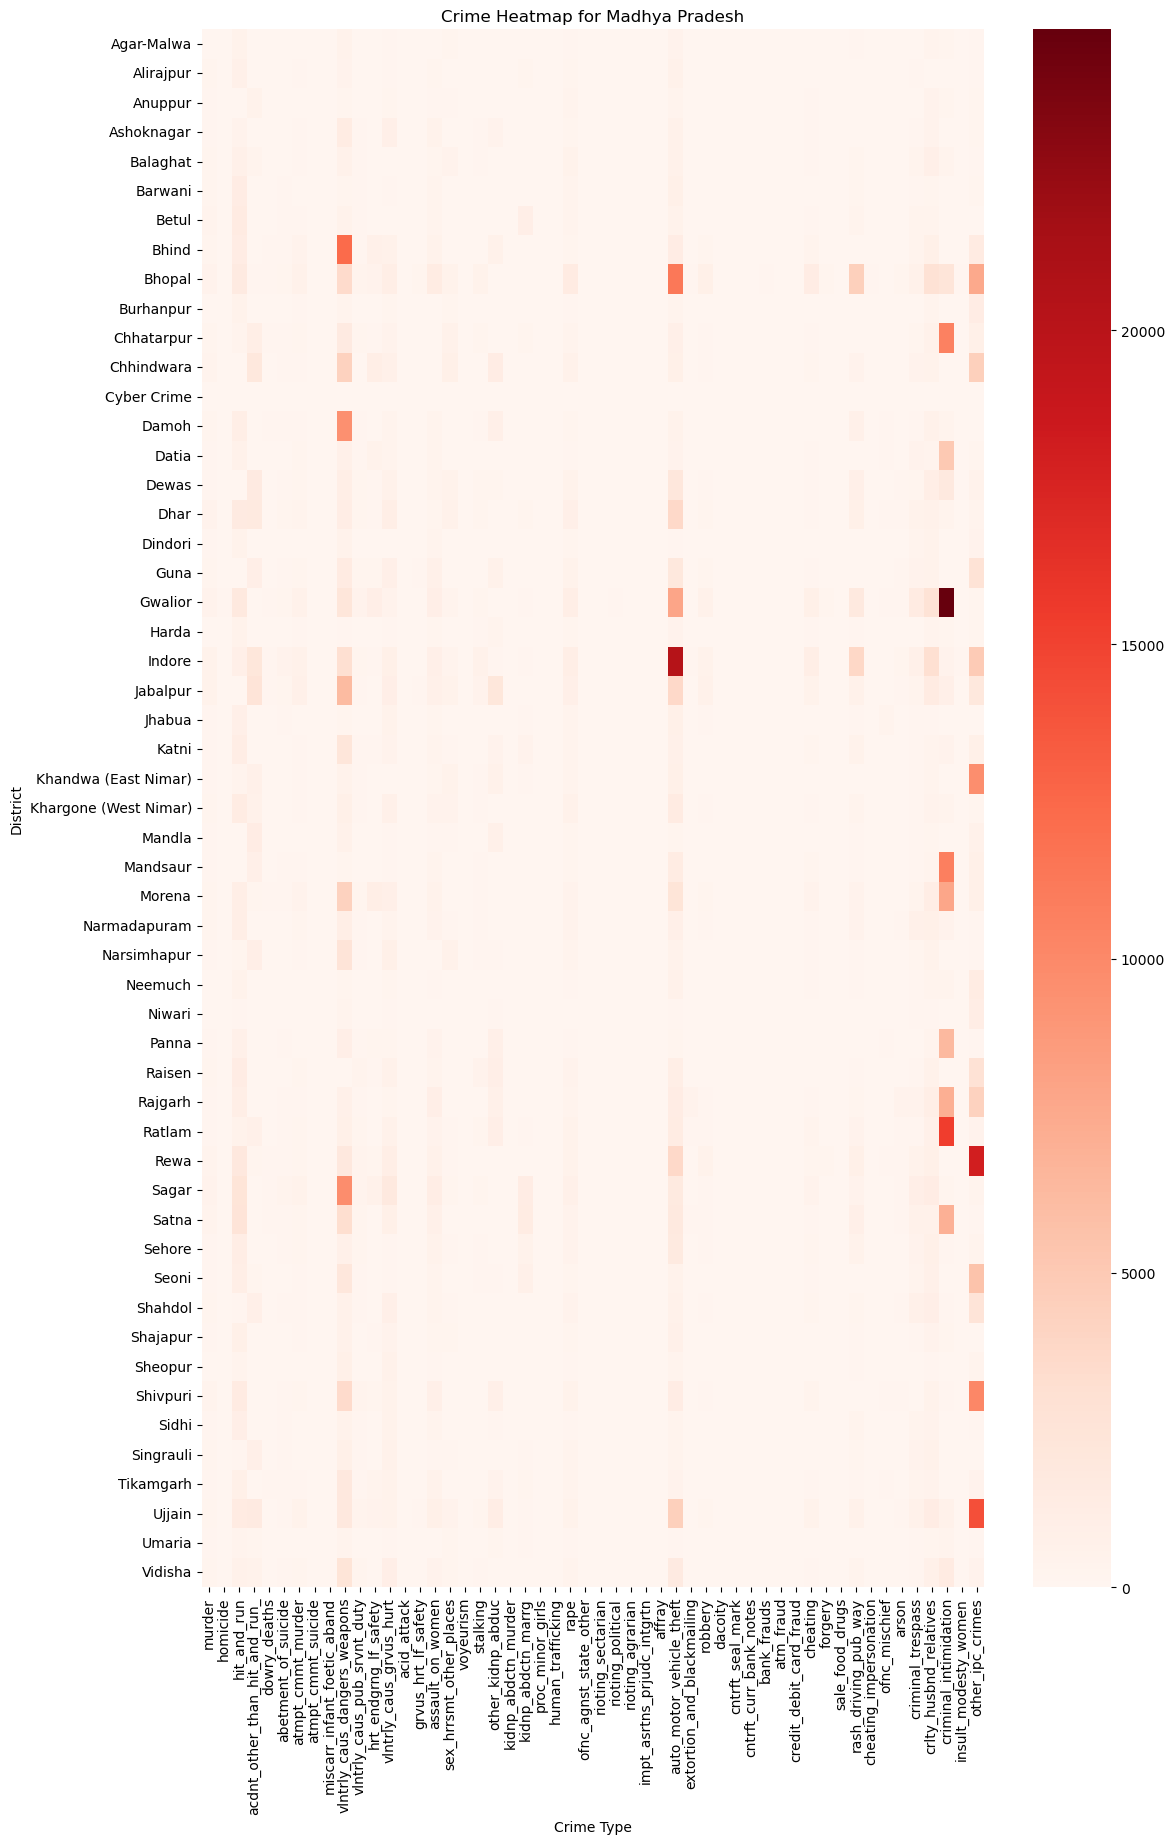

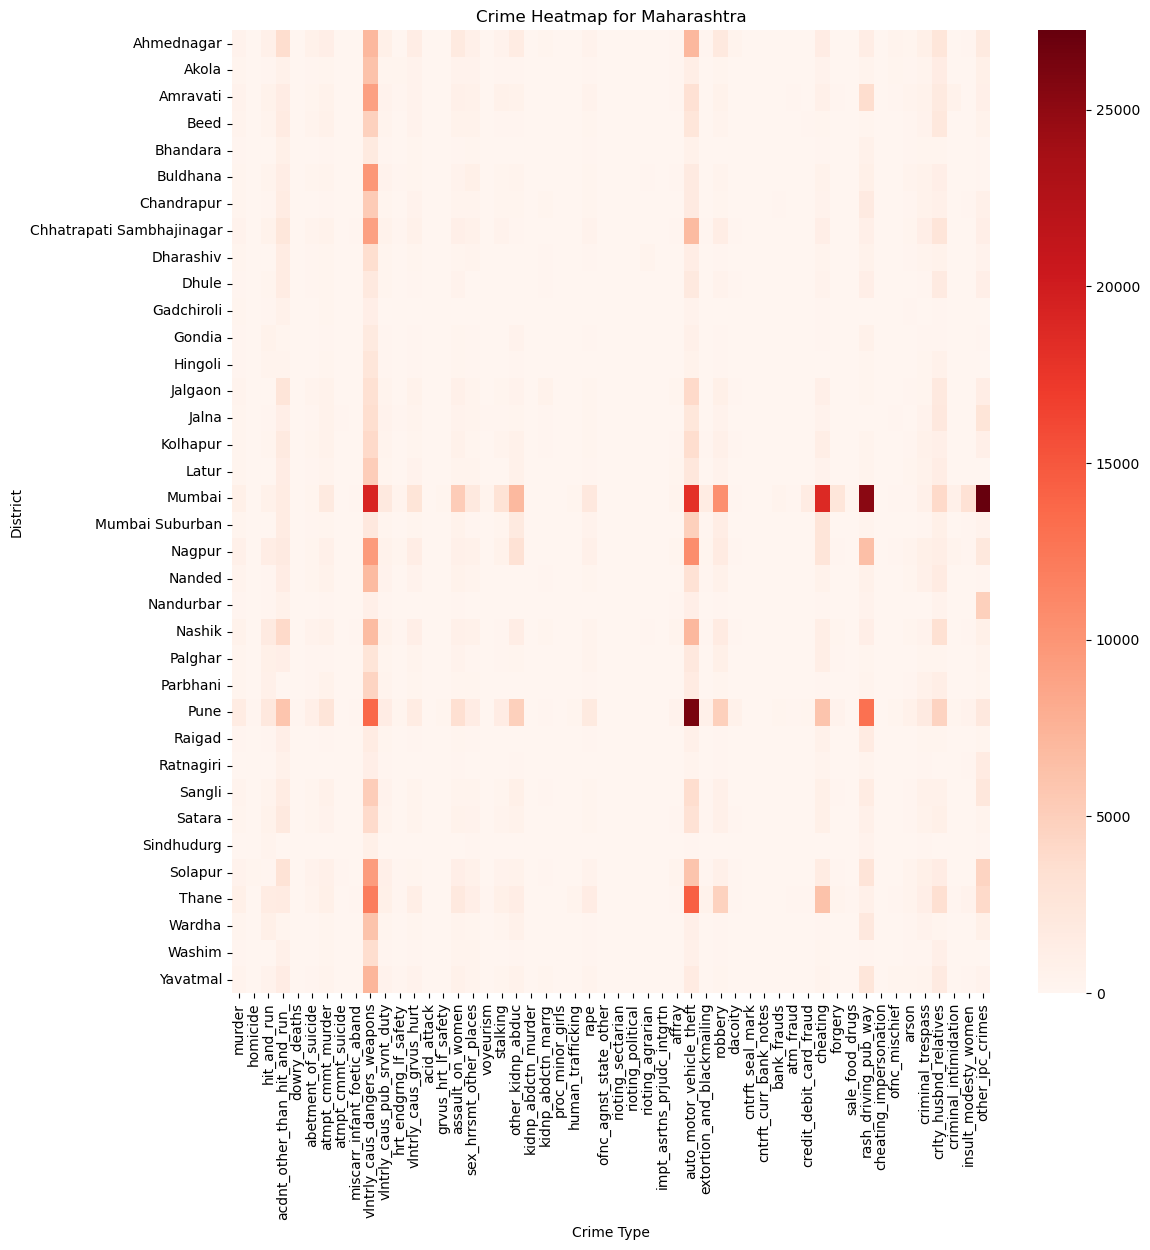

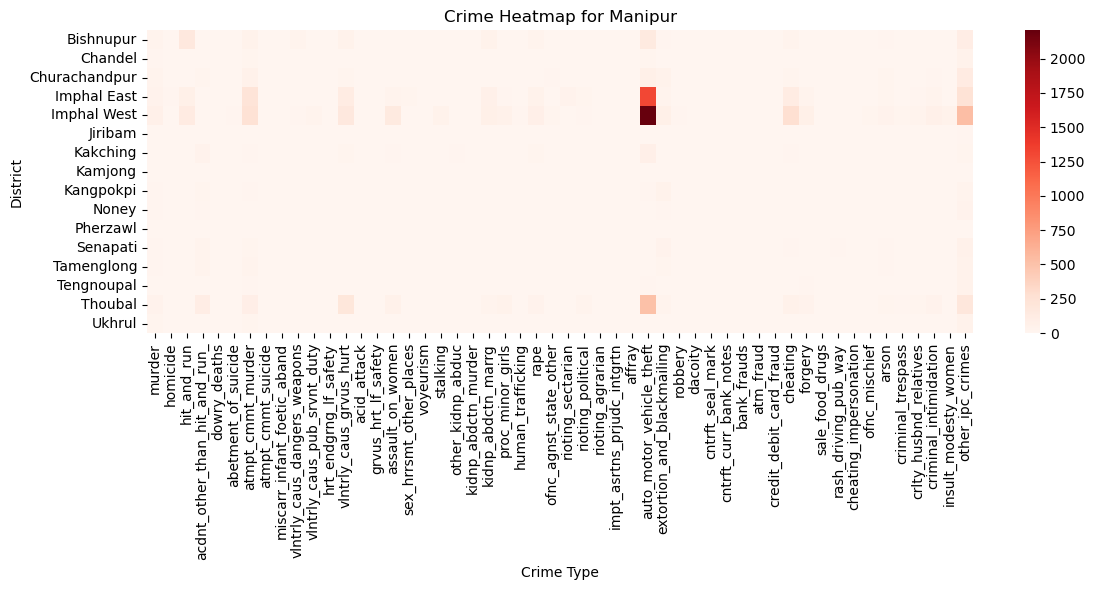

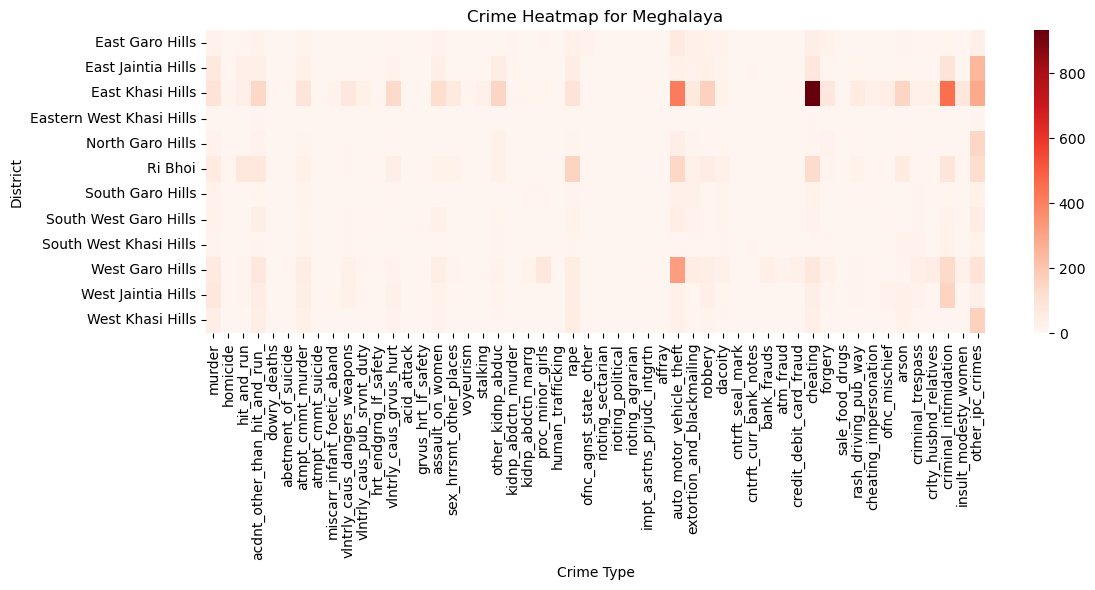

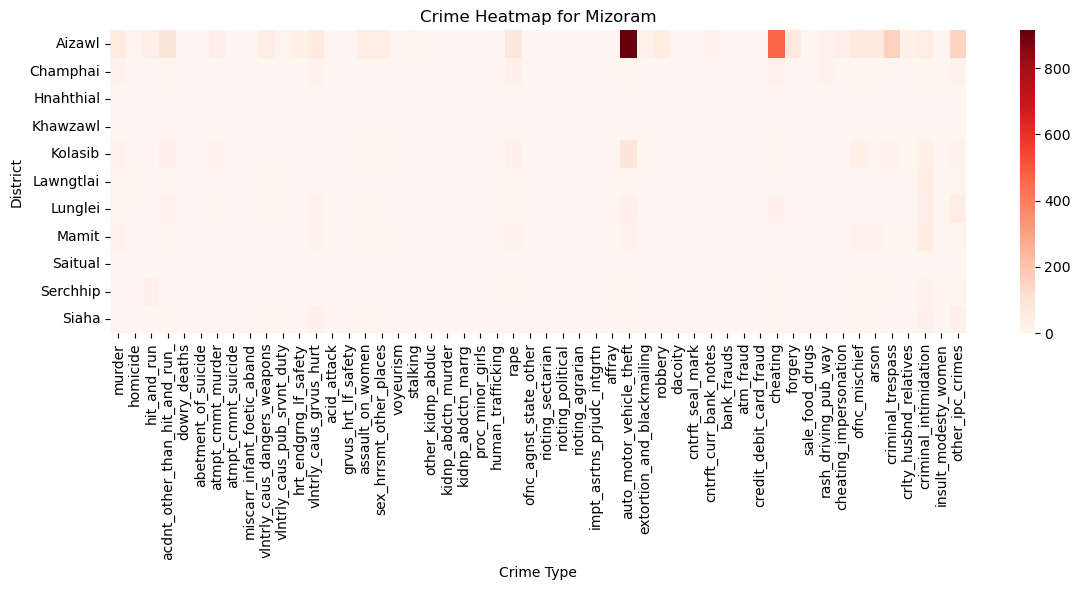

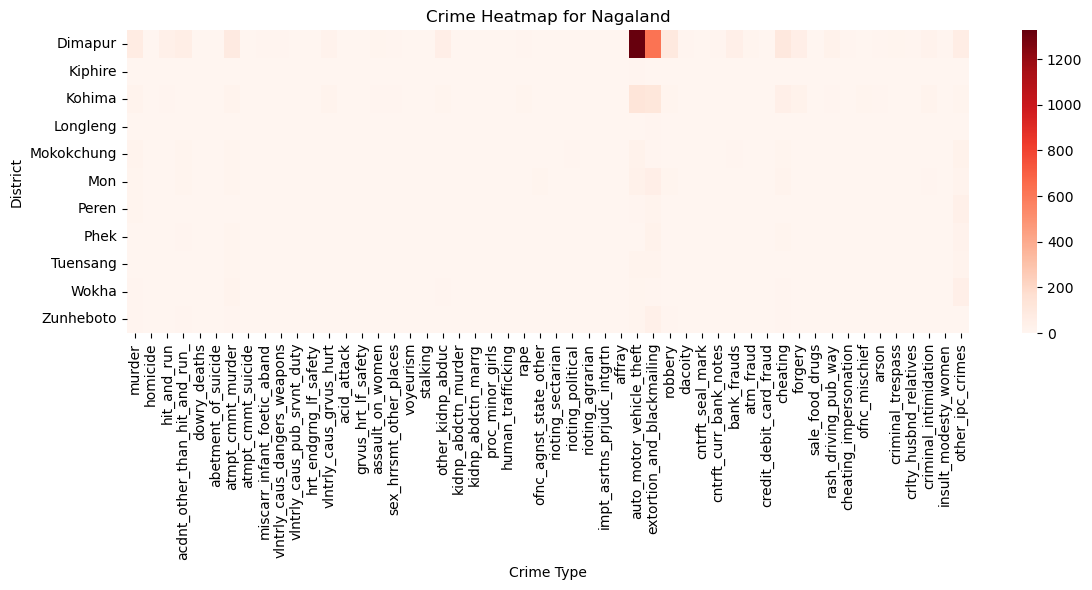

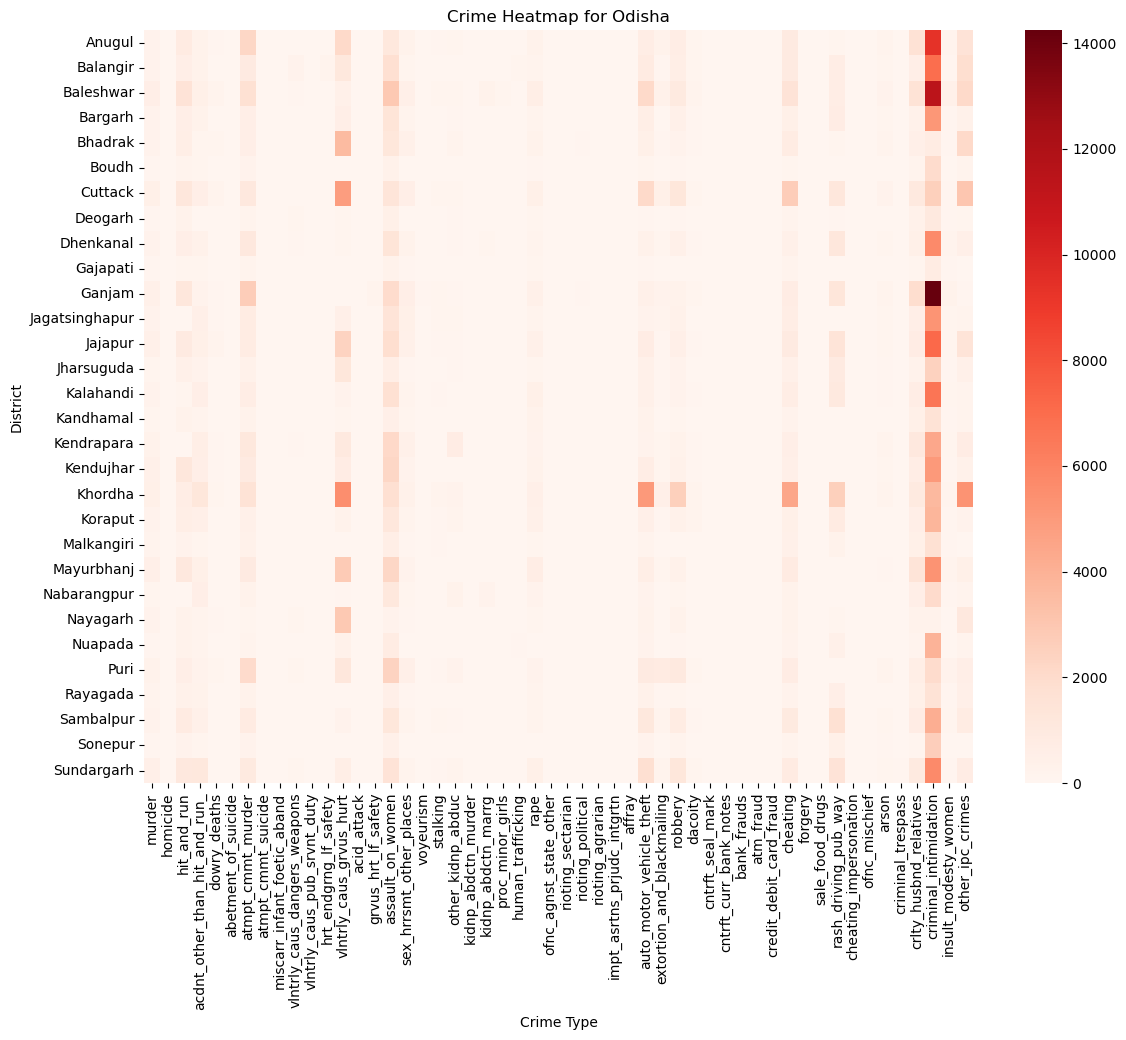

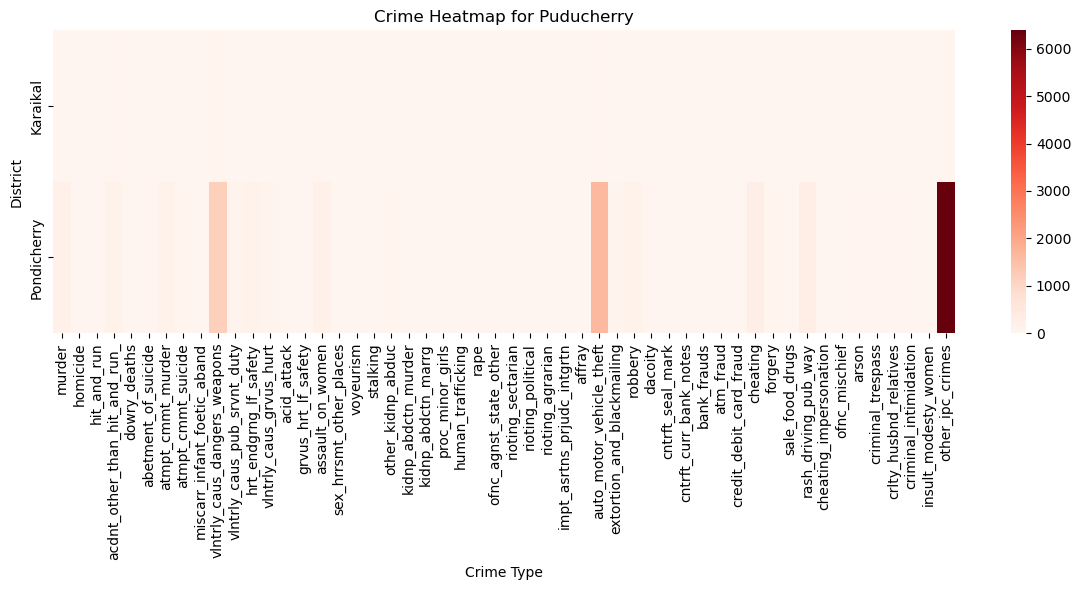

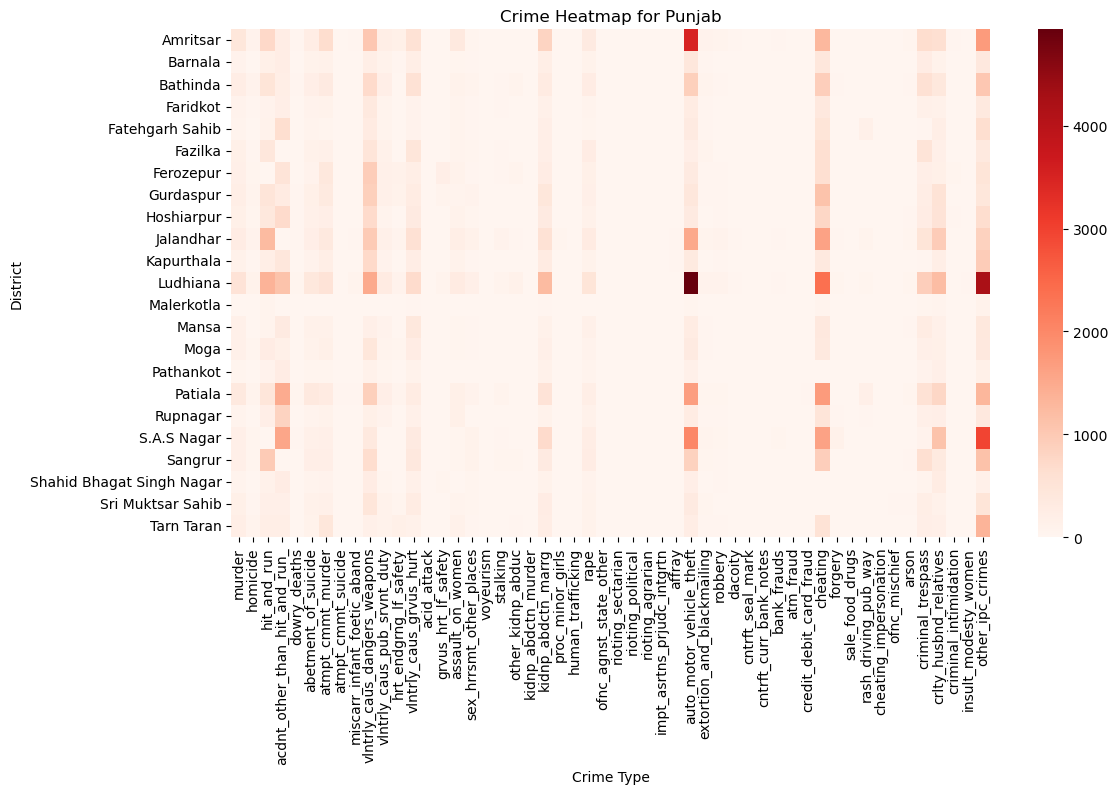

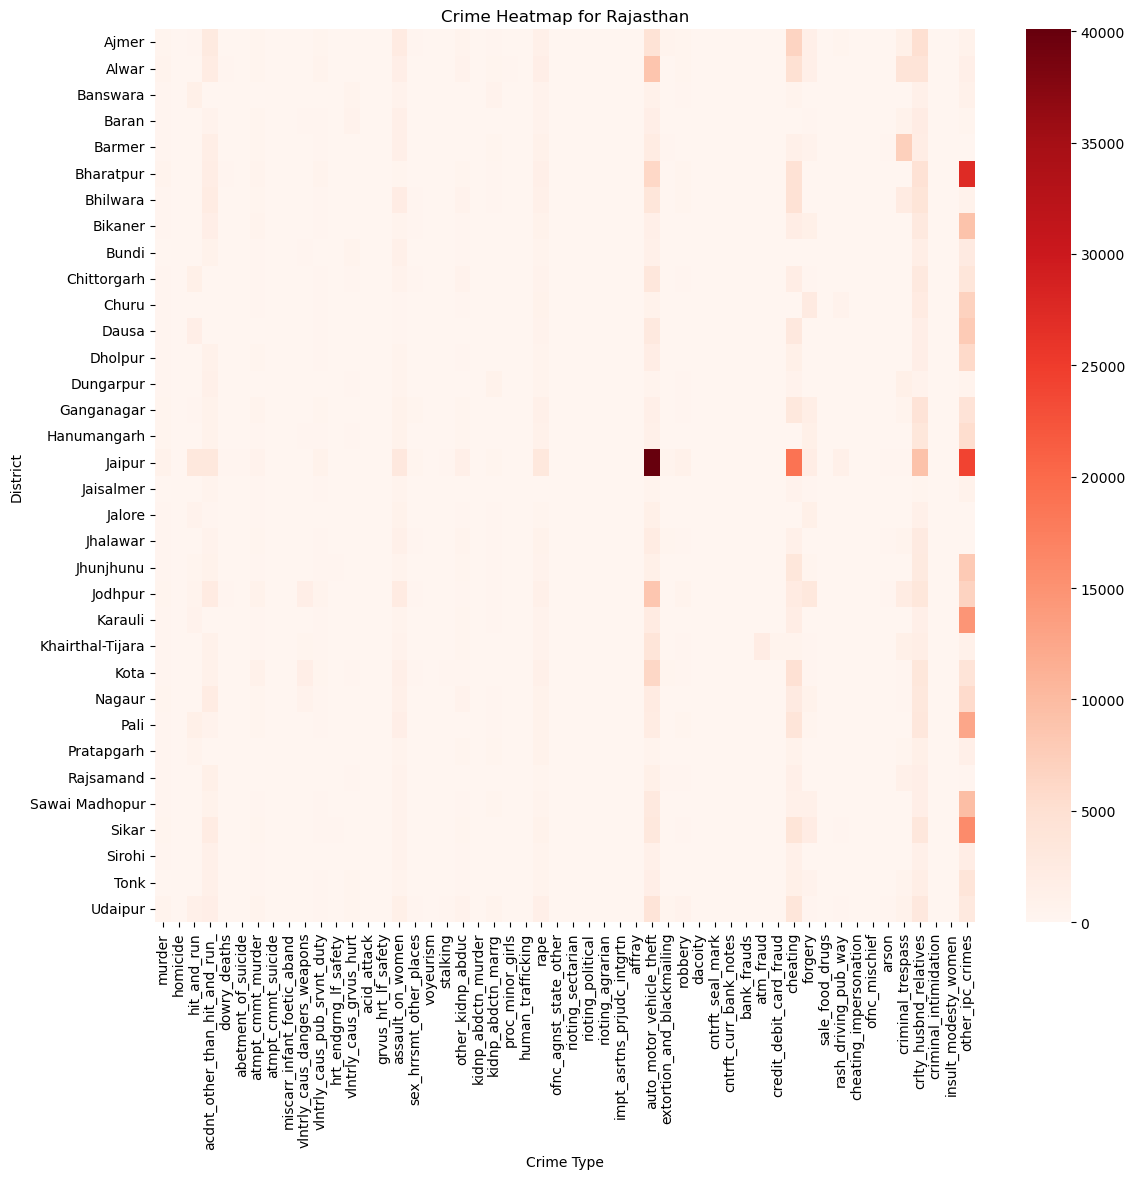

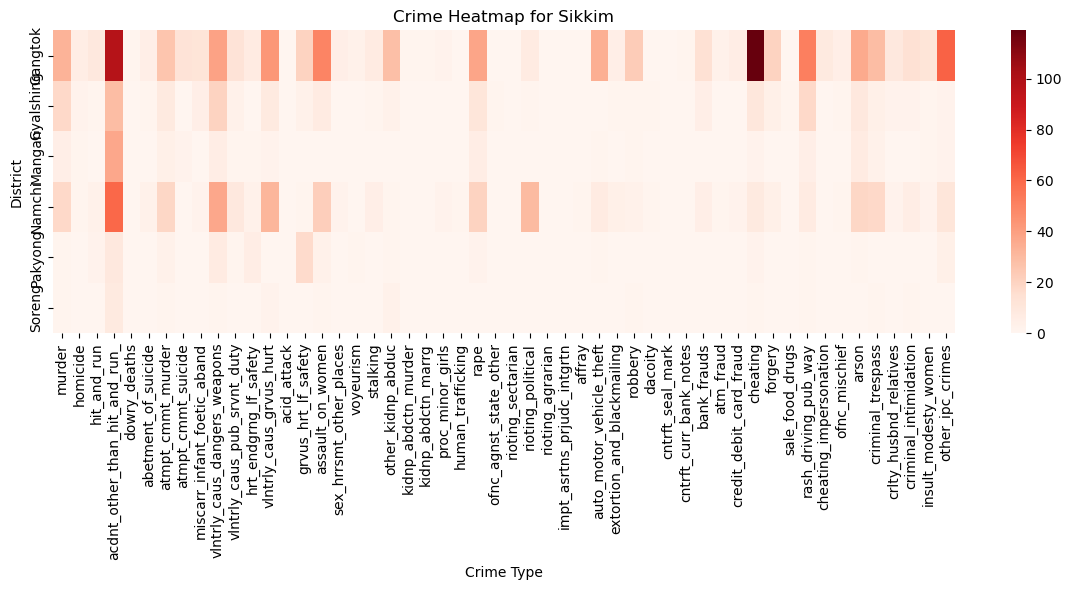

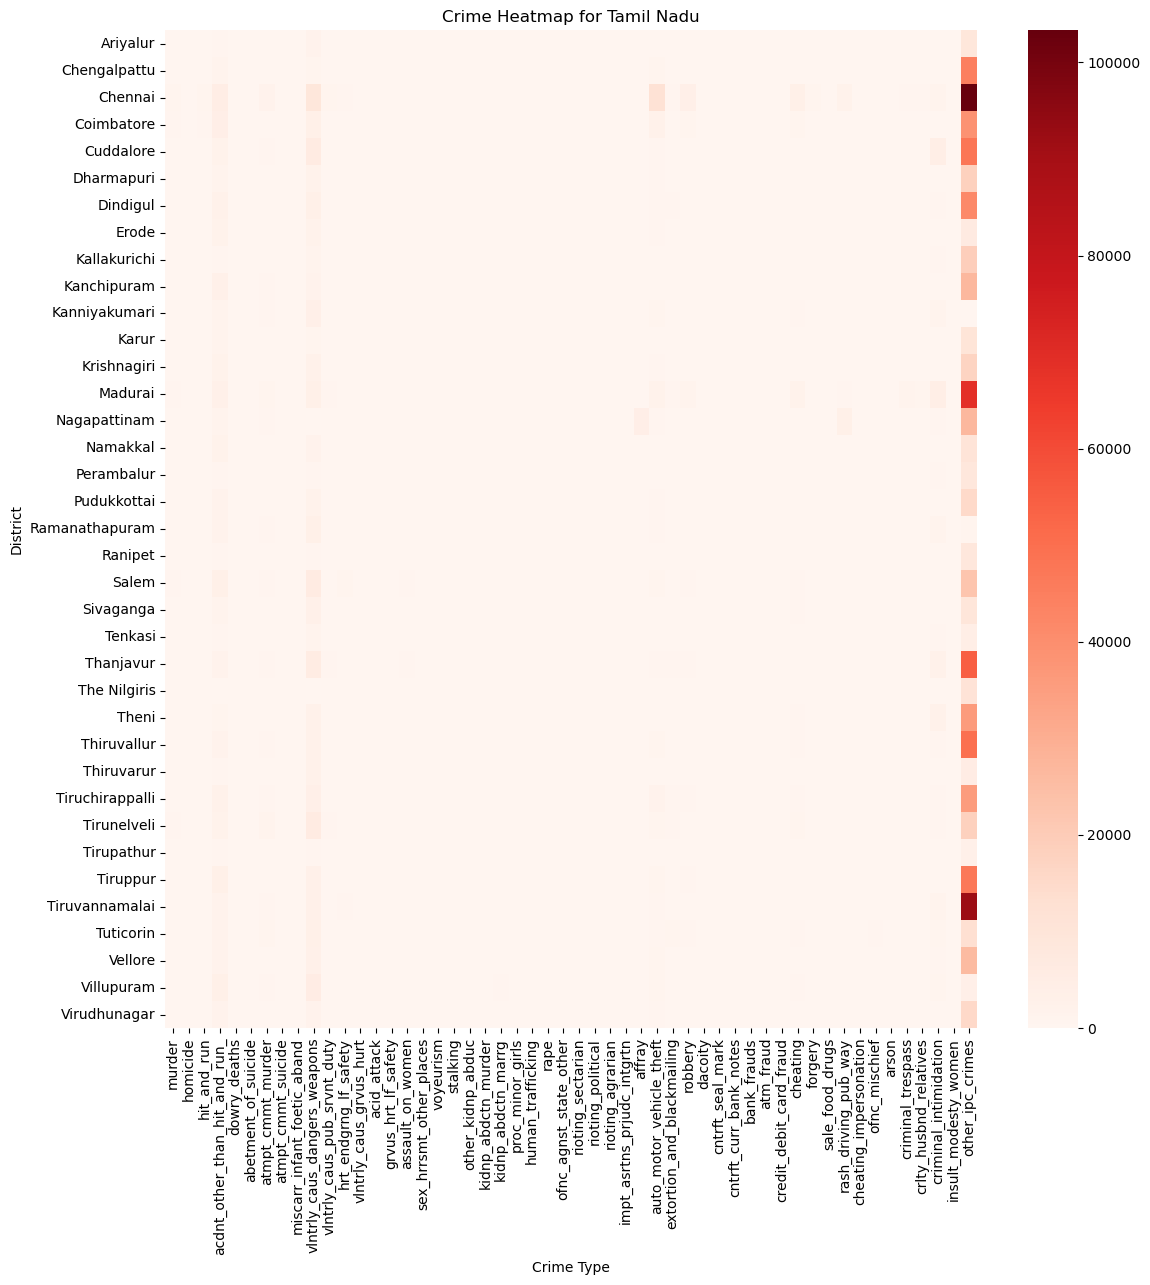

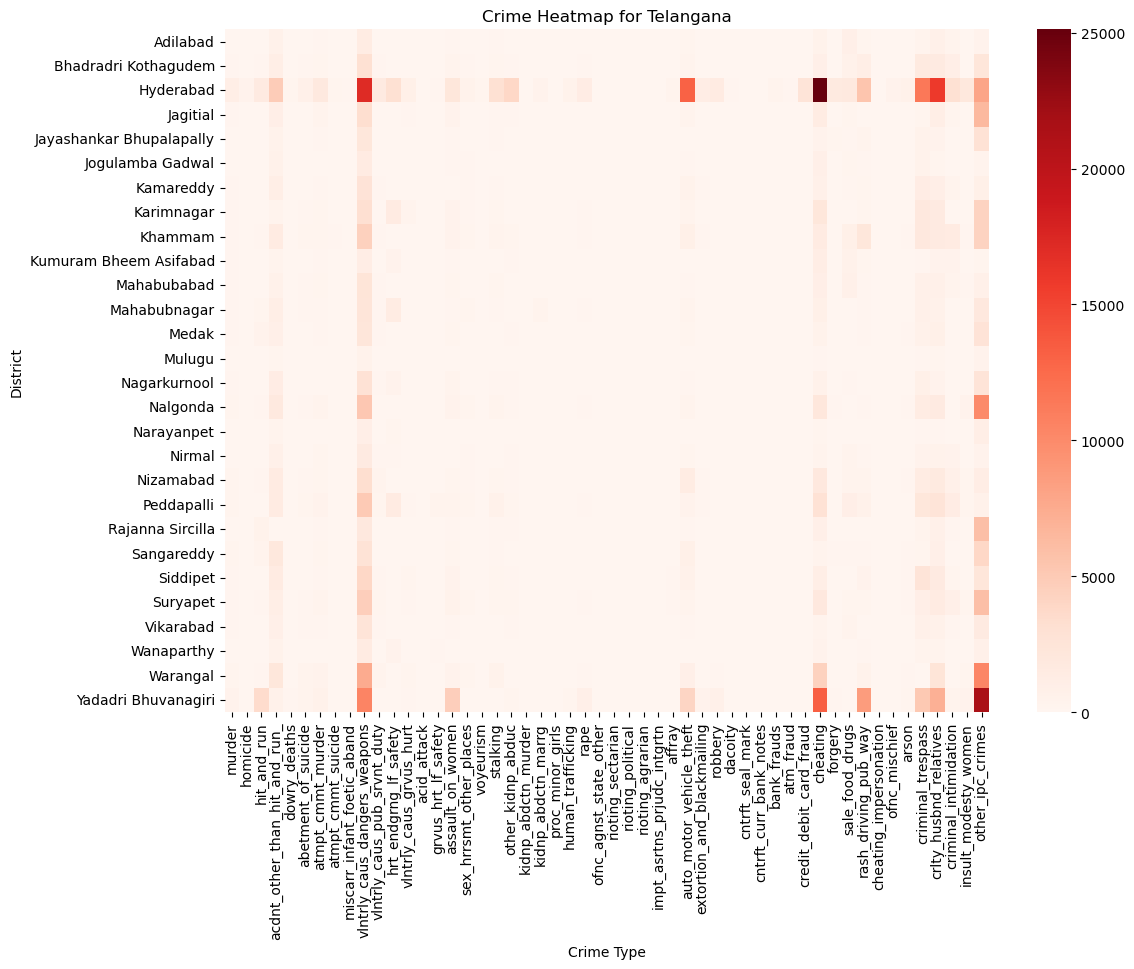

In [ ]:
district_df = df.groupby(
    ["state_name", "district_name"],
    as_index=False
)[crime_cols].sum()


# Select ONLY numeric crime columns
crime_only_cols = district_df.select_dtypes(include=np.number).columns

states = district_df["state_name"].unique()

for state in states:
    d = district_df[district_df["state_name"] == state]

    if d.empty:
        continue

    pivot = d.set_index("district_name")[crime_only_cols]

    # Safety check
    if pivot.empty:
        continue

    plt.figure(figsize=(12, max(6, len(pivot) * 0.35)))
    sns.heatmap(pivot, cmap="Reds", annot=False)
    plt.title(f"Crime Heatmap for {state}")
    plt.xlabel("Crime Type")
    plt.ylabel("District")
    plt.tight_layout()
    plt.show()